In [1]:
import pandas as pd
import mne
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
# %matplotlib tk

In [28]:
ch_names = [f"Ch{i}" for i in range(32)]

ch_types = ['eeg'] * 32

sampling_freq = 1000  # in Hertz

info = mne.create_info(ch_names= ch_names, ch_types= ch_types, sfreq= sampling_freq)

a = mne.io.RawArray(first_df.to_numpy(), info)

Creating RawArray with float64 data, n_channels=32, n_times=10012
    Range : 0 ... 10011 =      0.000 ...    10.011 secs
Ready.


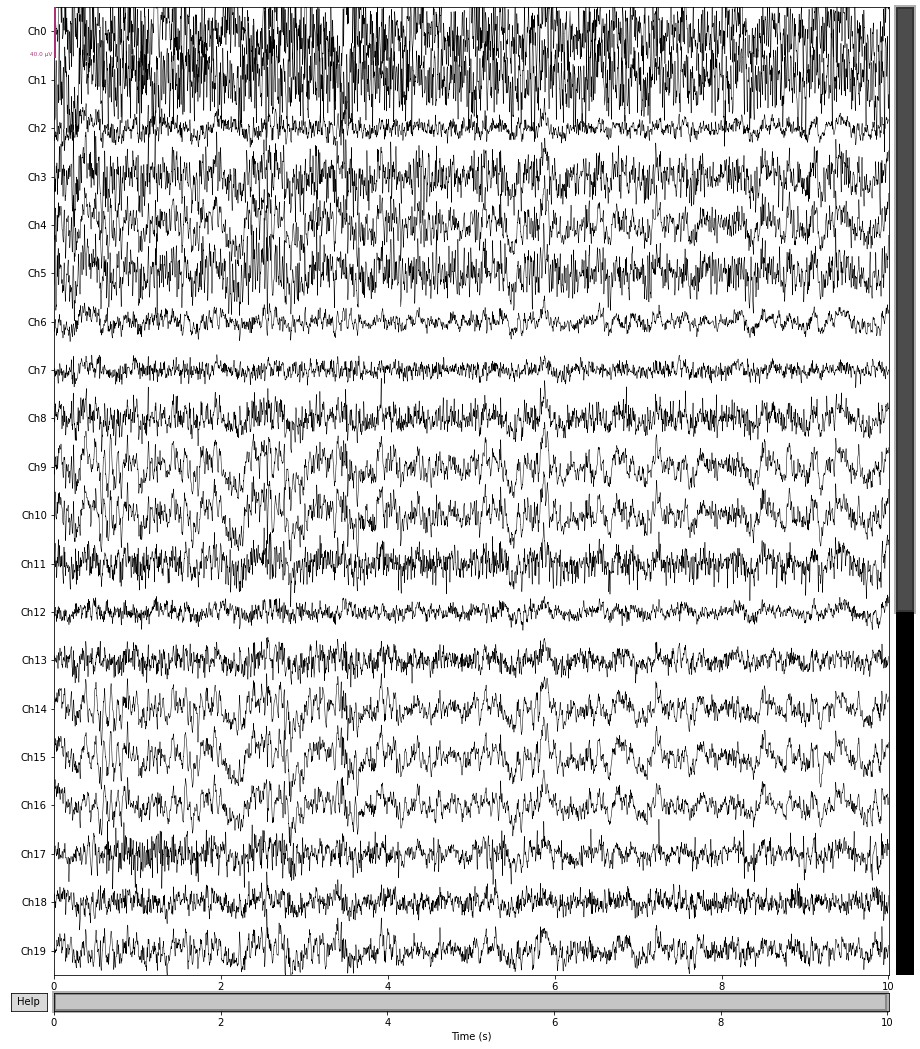

In [31]:
a.plot()

In [17]:
from thinkdsp import *

In [74]:
def smooth(df):
    for i in range(df.shape[1]):
        arr = df.iloc[:, i].to_numpy()
#         plt.figure(figsize=(20,5))
        wave = Wave(ys=arr, framerate=1000)
#         wave.plot()
        spec = wave.make_spectrum()
        spec.high_pass(0.5)
        spec.low_pass(15)
#         spec.make_wave().plot()
        df.iloc[:, i] = spec.make_wave().ys
    return df

In [75]:
first_df = pd.read_csv('first.csv', header=None).T
first_df = smooth(first_df)
second_df = pd.read_csv('second.csv', header=None).T
second_df = smooth(second_df)

In [82]:
first_df.mean(axis=1).shape

(10012,)

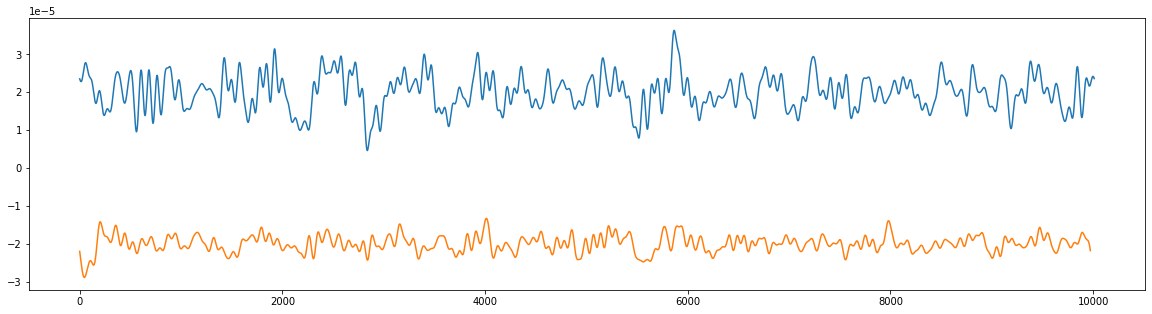

In [87]:
plt.figure(figsize=(20,5))
plt.plot(first_df.mean(axis=1).to_numpy() + 2e-5)
plt.plot(second_df.mean(axis=1).to_numpy() - 2e-5)
plt.show()

<Figure size 1440x360 with 0 Axes>

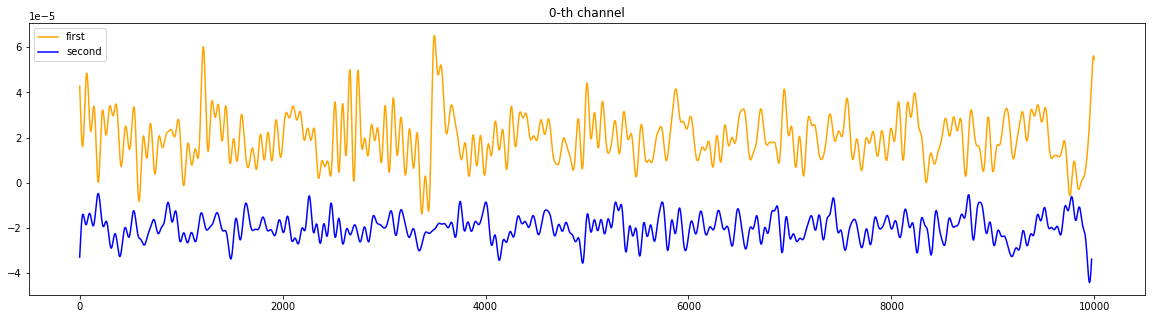

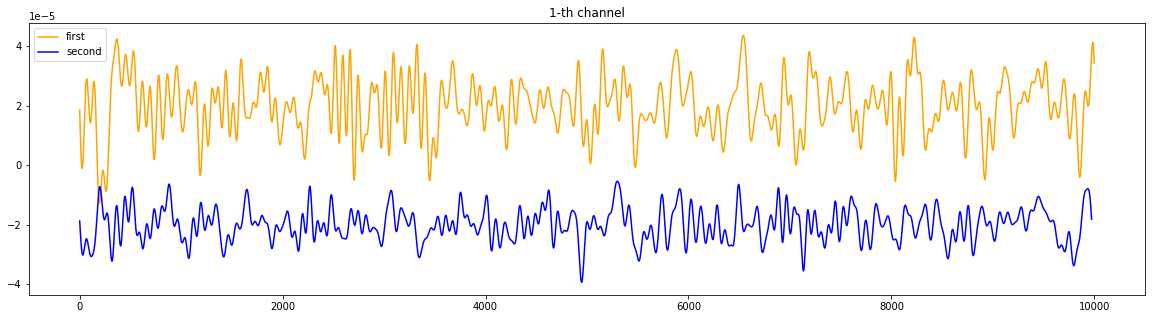

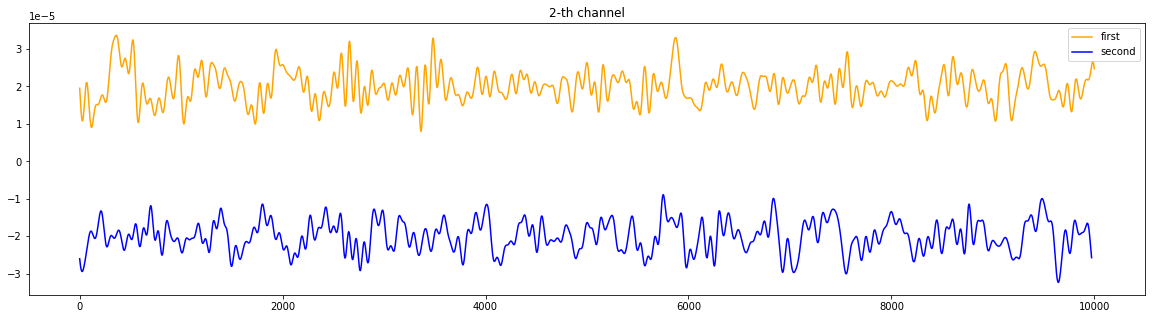

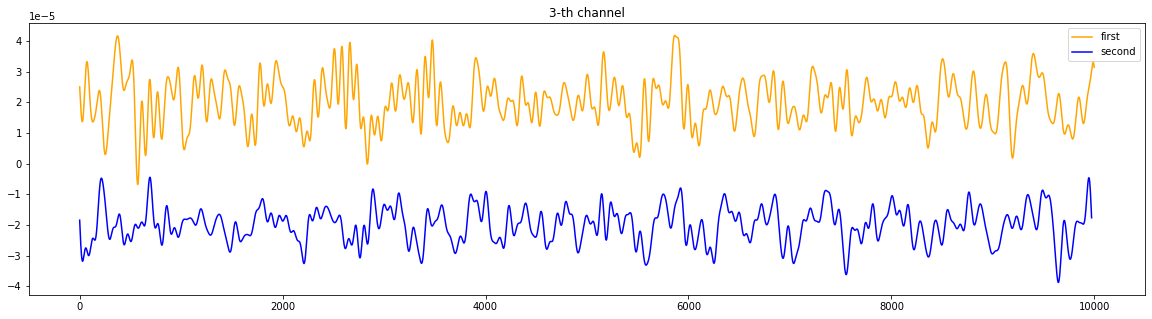

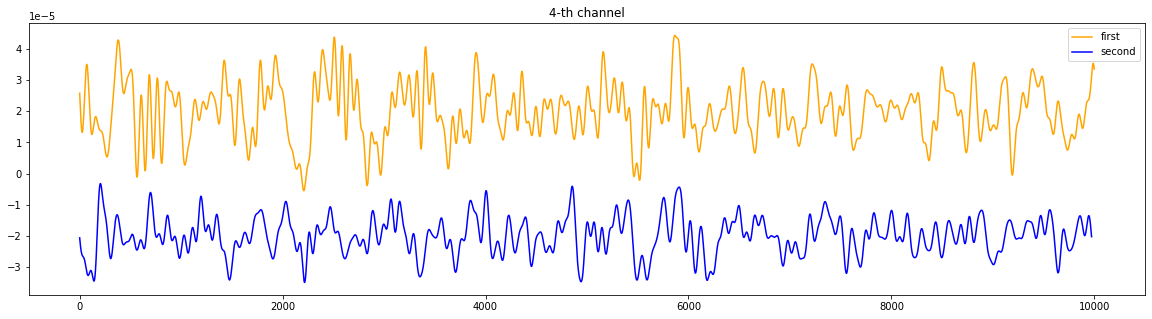

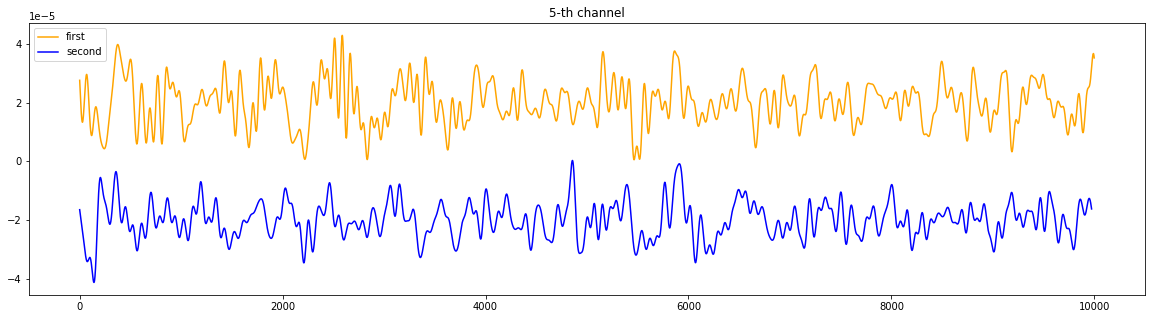

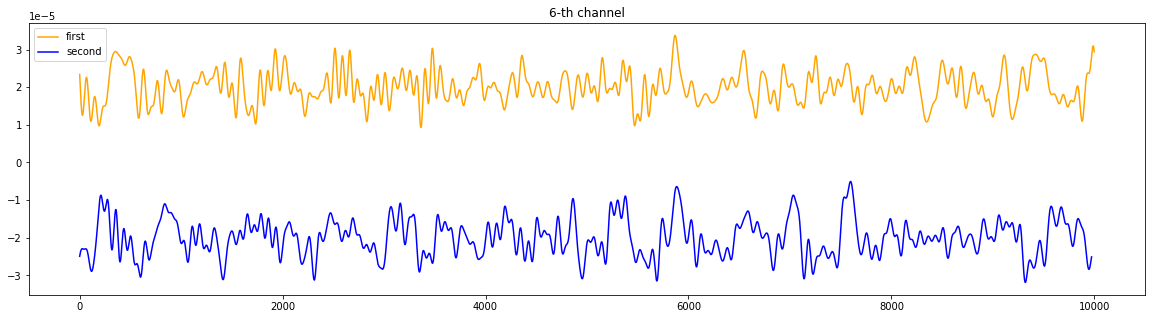

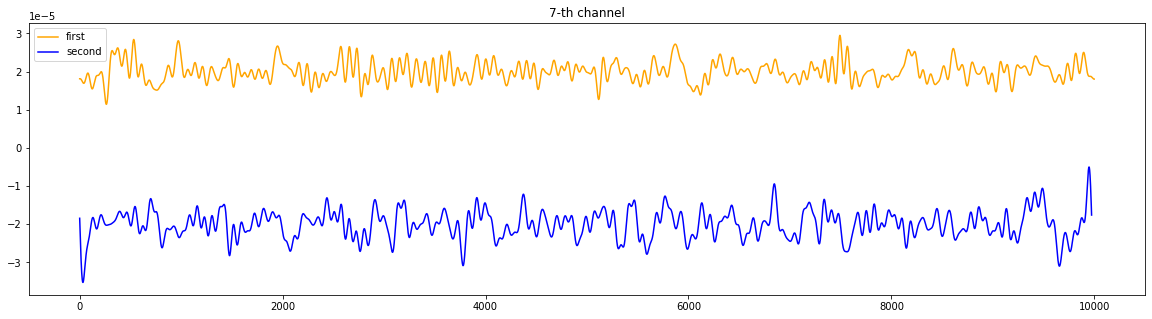

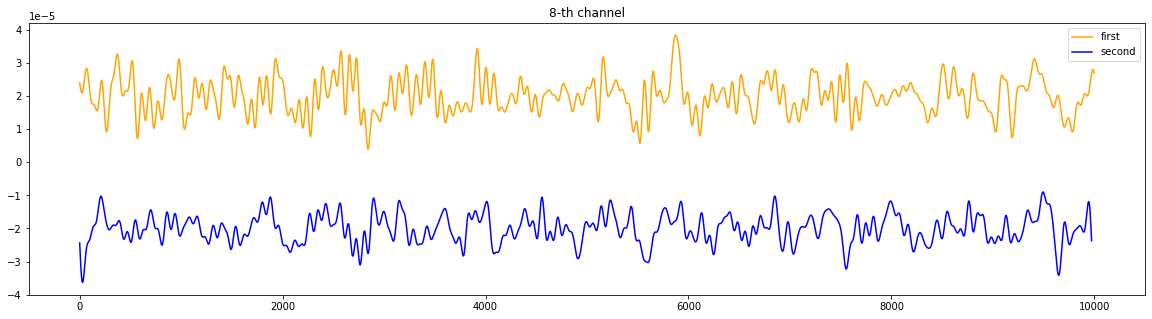

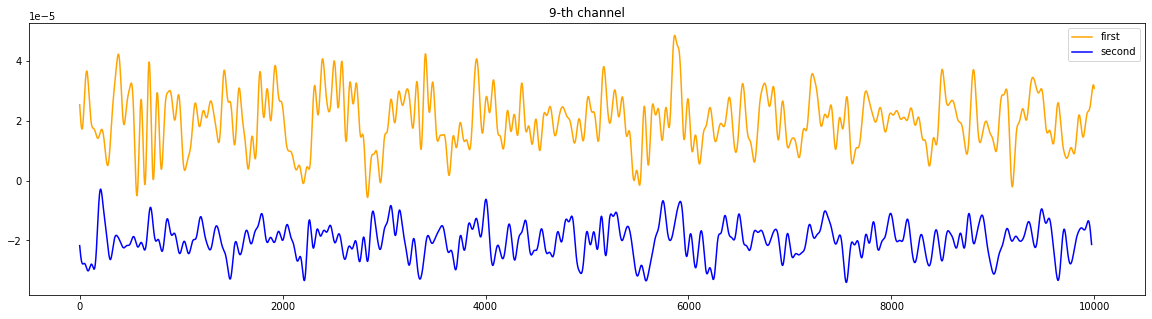

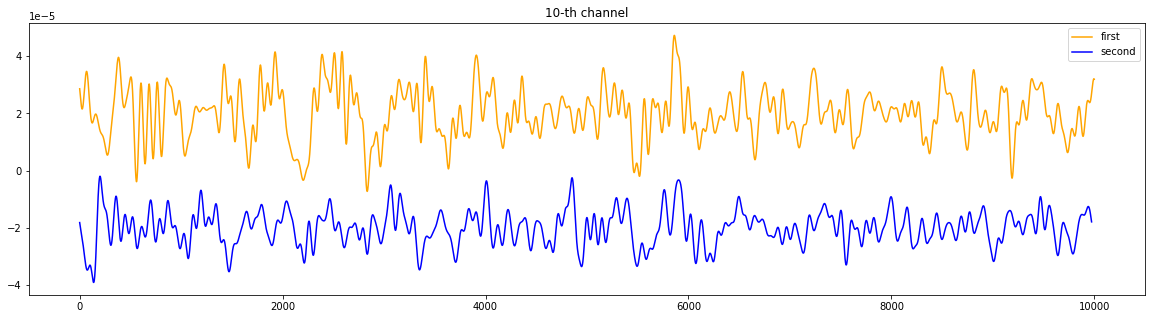

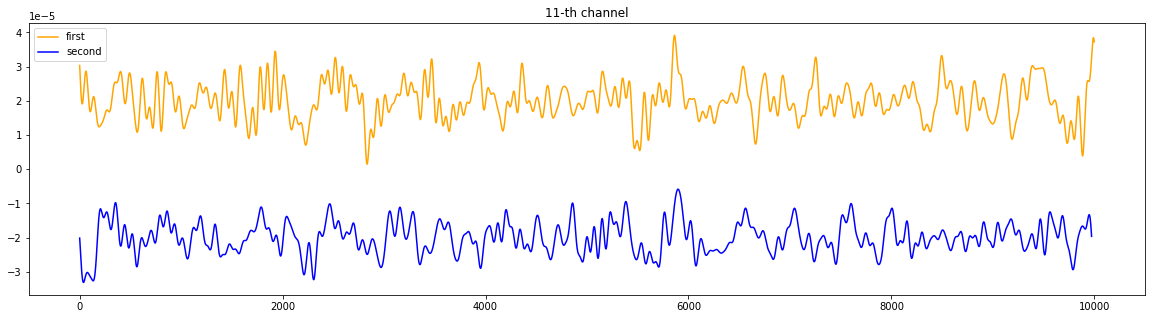

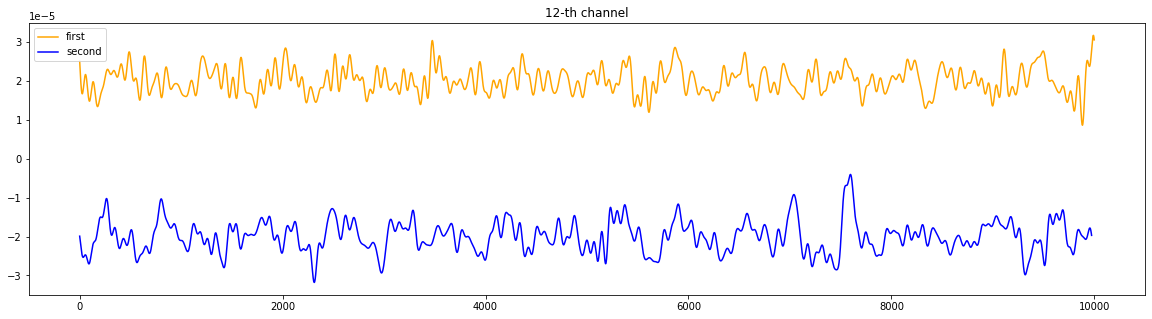

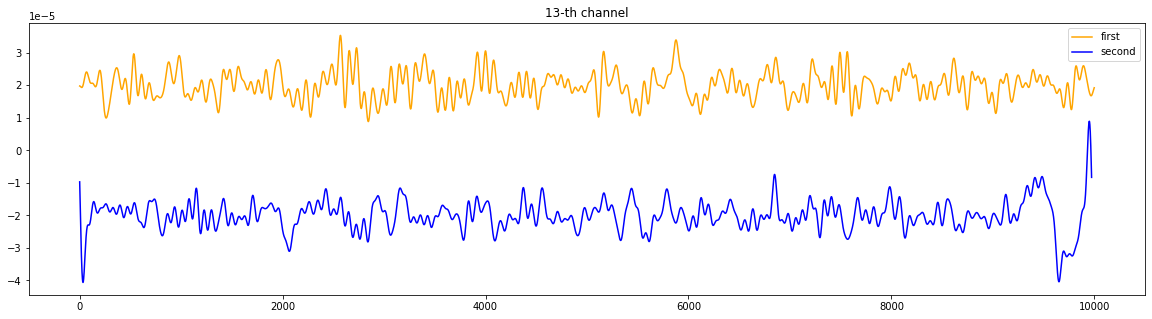

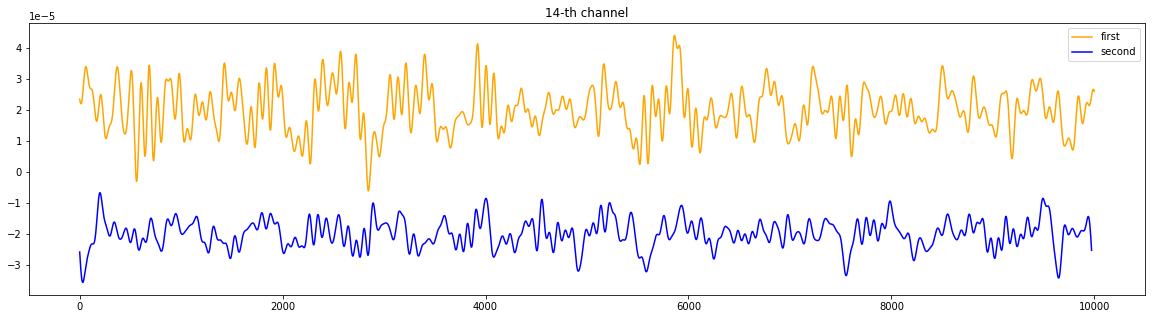

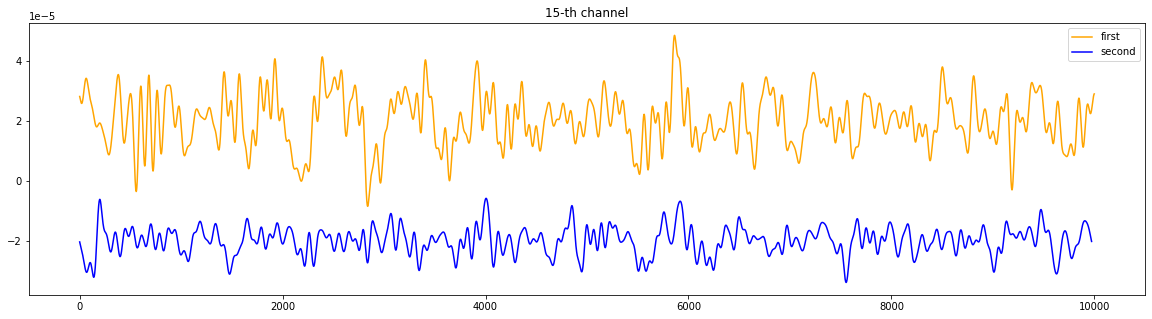

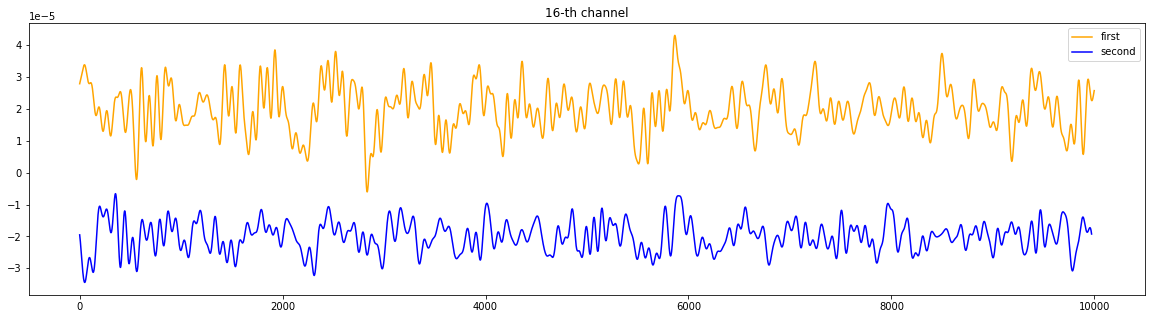

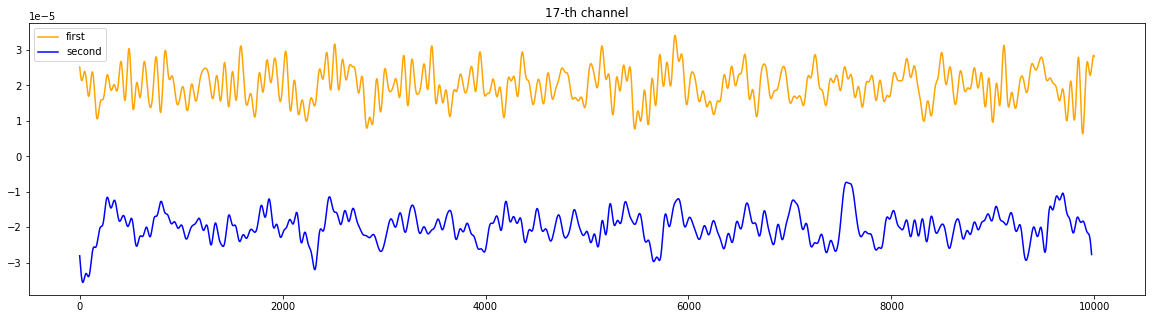

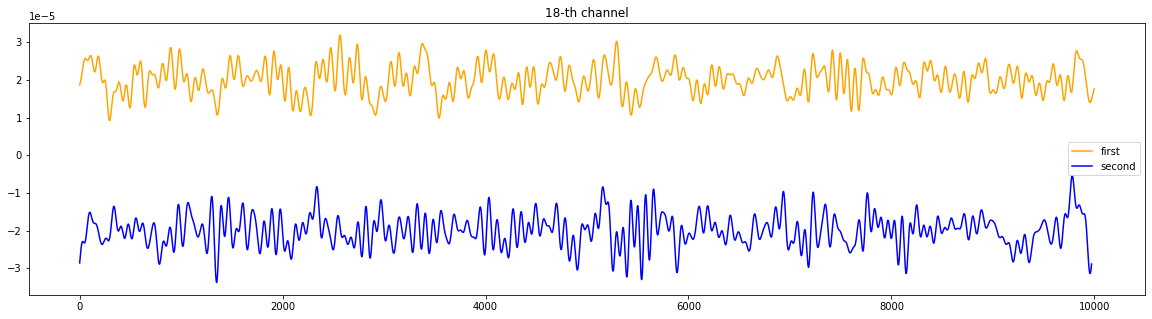

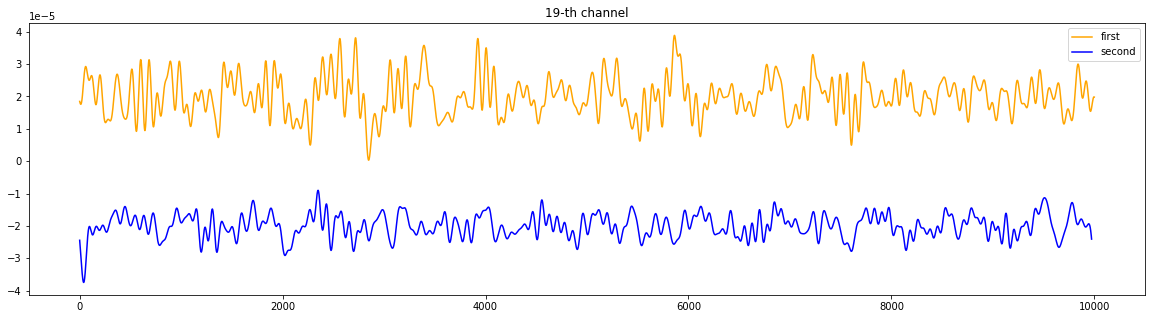

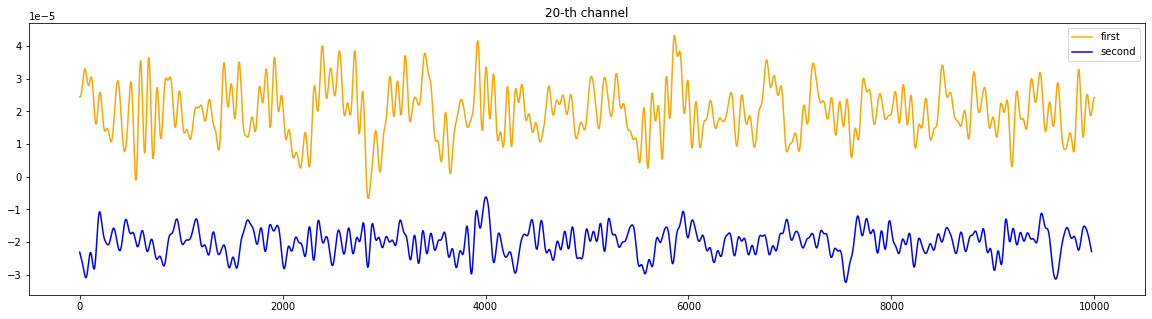

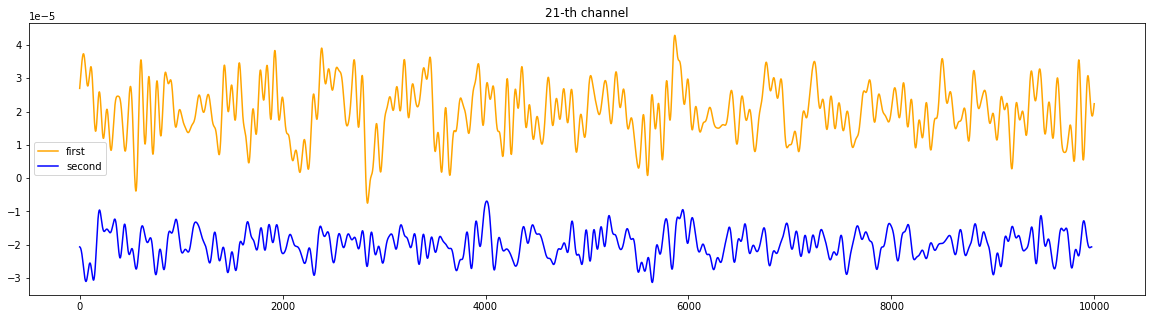

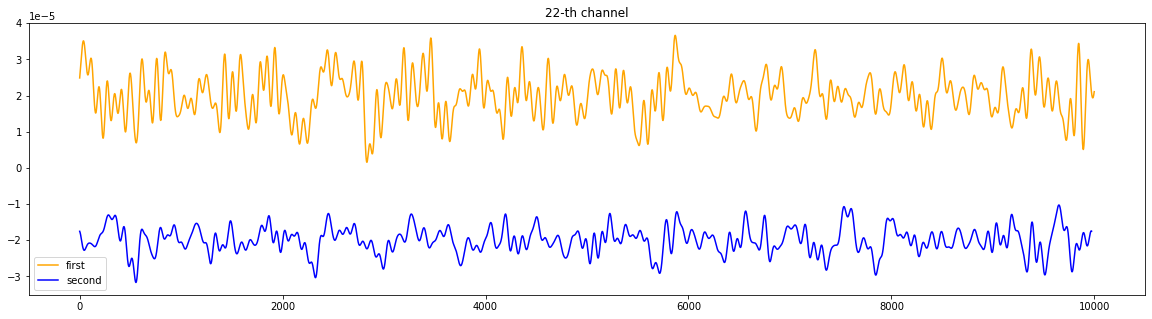

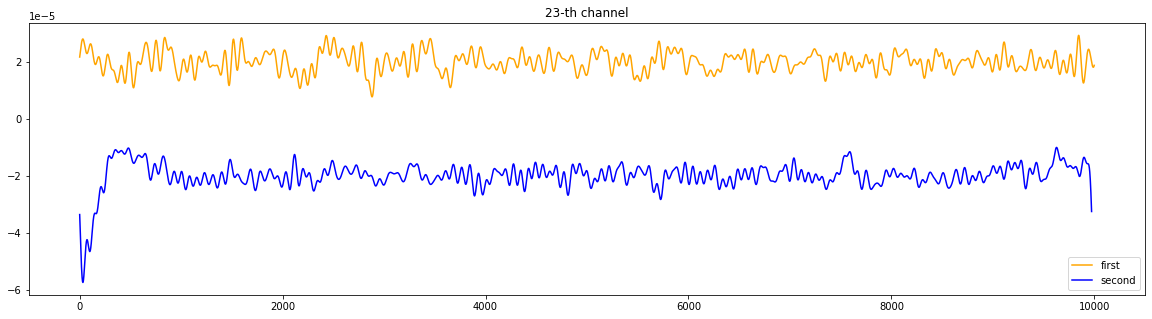

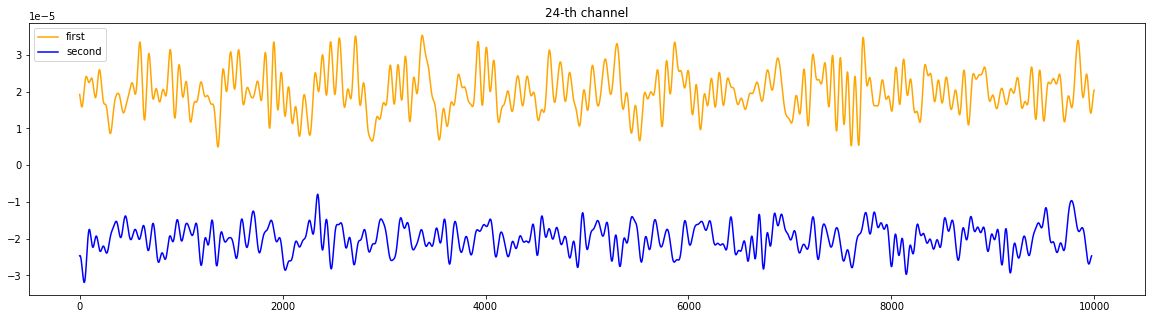

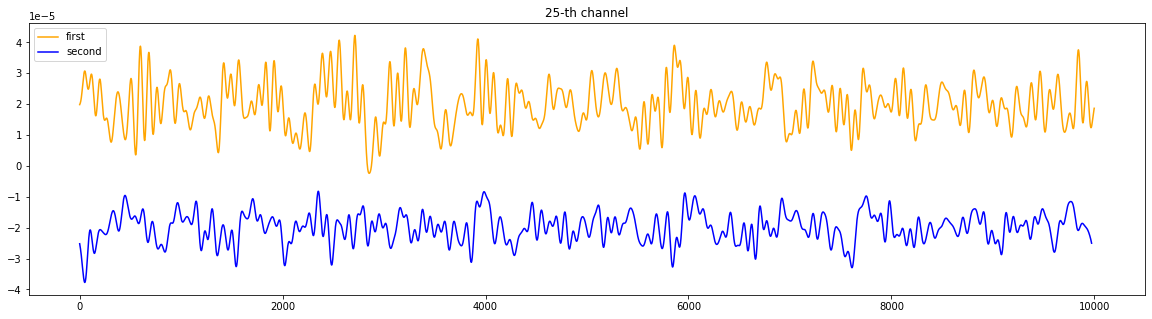

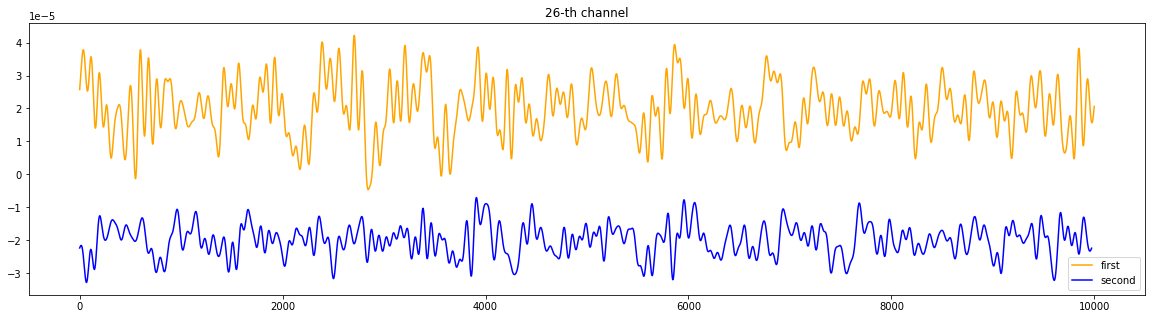

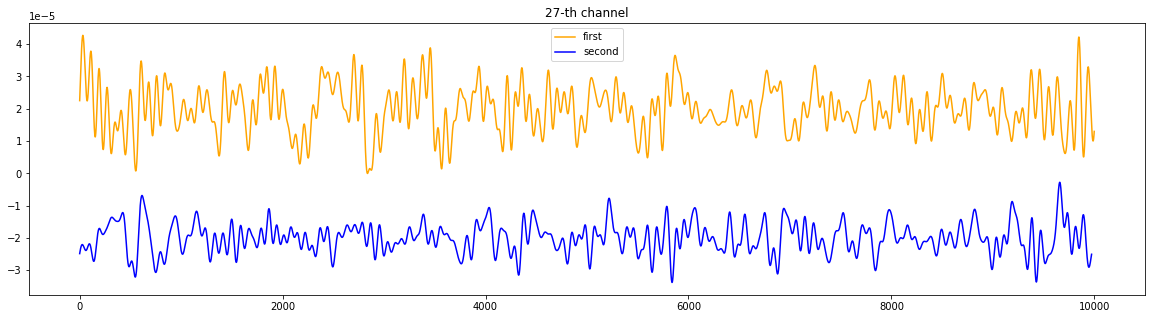

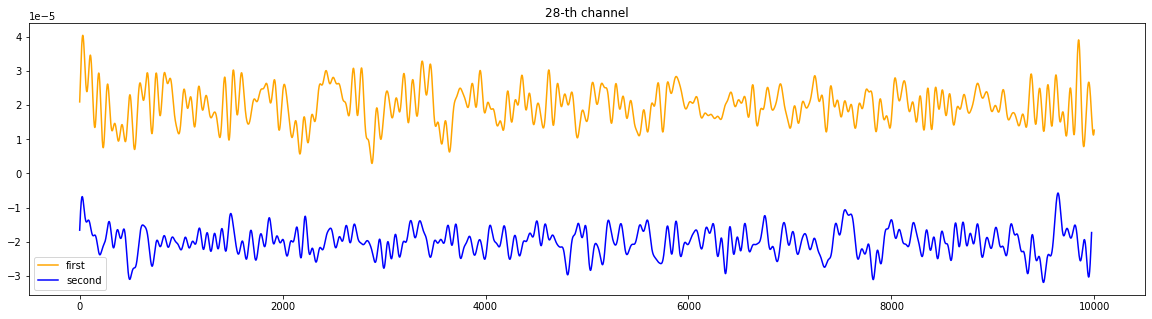

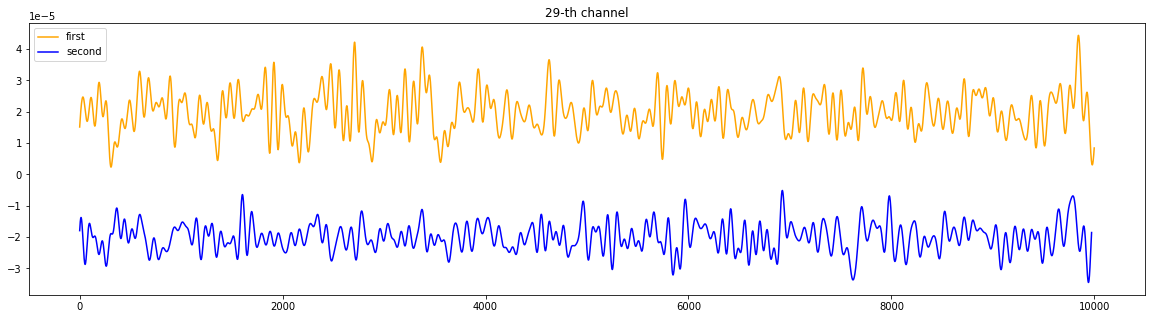

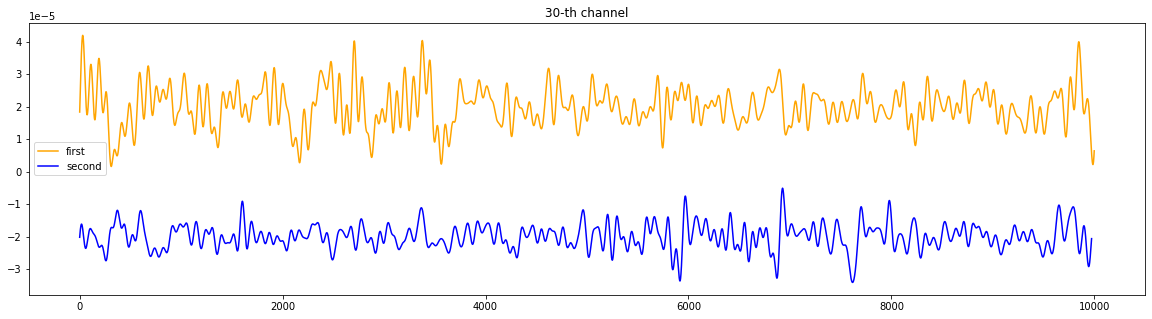

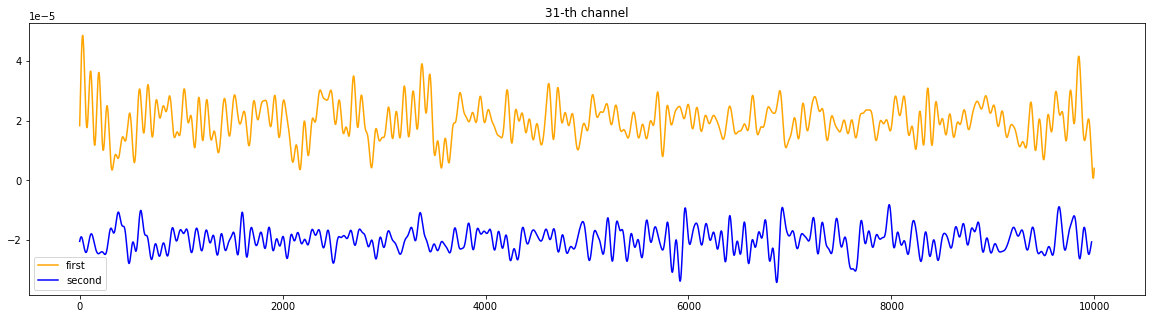

In [94]:
%matplotlib inline
fr = 0
to = 10000
plt.figure(figsize=(20,5))
for i in range(first_df.shape[1]):
#     if i == 0:
    plt.figure(figsize=(20,5))
    plt.plot(first_df.iloc[fr:to, i] + 2e-5, label='first', color='orange')
    plt.plot(second_df.iloc[fr:to, i] - 2e-5, label='second', color='blue')
#     else:
#         plt.plot(first_df.iloc[fr:to, i] + 5e-5, color='orange')
#         plt.plot(second_df.iloc[fr:to, i] - 5e-5, color='blue')
    plt.legend(loc='best')
    plt.title(f'{i}-th channel')
    plt.show()
#     break
    
plt.show()